In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv"
df = pd.read_csv(url)

In [3]:
print(df['Gender'].unique())
df['Gender'] = df['Gender'].apply(lambda x: x.lower())
print(df['Profit'].sort_values())
df = df[(df['Profit'] != df['Profit'].min()) & (df['Profit'] != df['Profit'].max())]

['male' 'female' 'Female' 'FEMALE']
2759   -9643950
3179     -10200
4698      -9800
8572      -7150
606       -7000
         ...   
6378     103900
7408     105250
8420     105950
2941     109500
8322    6643950
Name: Profit, Length: 8715, dtype: int64


In [4]:
#Blue_01
count_clients = len(df)
mean_profit_per_client = df['Profit'].mean()
new_cost_on_client = (1000 * 15000 + sum(df['Costs'])) / (count_clients + 1000)
print(count_clients, mean_profit_per_client, new_cost_on_client)
#Вывод: ??? прибыль больше чем траты

8713 15755.095833811545 13729.687017399361


In [5]:
#Blue_02
profit_men_18_24 = df[(df['Gender'] == "male") & (df['AgeGroup'] == "18-24")]['Profit']
profit_men_18_24 = profit_men_18_24.mean()
profit_women_18_24 = df[(df['Gender'] == "female") & (df['AgeGroup'] == "18-24")]['Profit']
profit_women_18_24 = profit_women_18_24.mean()
print(profit_men_18_24, profit_women_18_24)

13155.762435444414 26278.37389380531


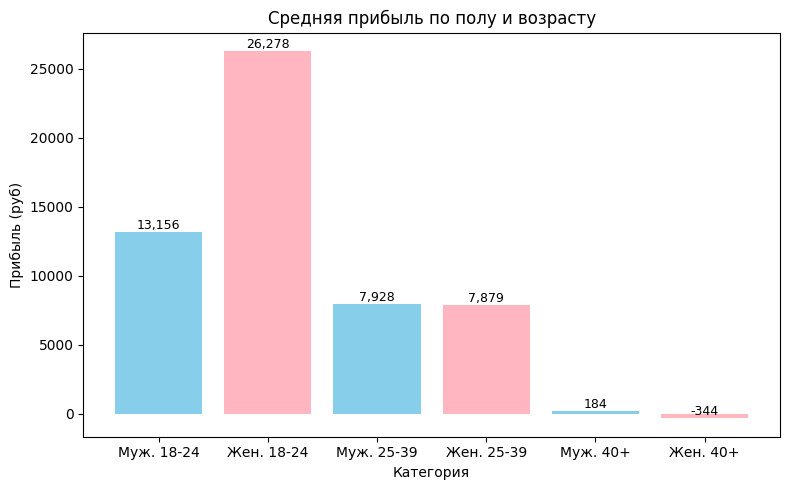

In [20]:
#Red
profit_df_men_25_39 = df[(df['Gender'] == "male") & (df['AgeGroup'] == "25-39")]['Profit']
profit_df_men_25_39 = profit_df_men_25_39.mean()
profit_df_women_25_39 = df[(df['Gender'] == "female") & (df['AgeGroup'] == "25-39")]['Profit']
profit_df_women_25_39 = profit_df_women_25_39.mean()

profit_df_men_40 = df[(df['Gender'] == "male") & (df['AgeGroup'] == "40+")]['Profit']
profit_df_men_40 = profit_df_men_40.mean()
profit_df_women_40 = df[(df['Gender'] == "female") & (df['AgeGroup'] == "40+")]['Profit']
profit_df_women_40 = profit_df_women_40.mean()

categories = ['Муж. 18-24', 'Жен. 18-24', 'Муж. 25-39', 'Жен. 25-39', 'Муж. 40+', 'Жен. 40+']
profits = [
    profit_men_18_24,
    profit_women_18_24,
    profit_df_men_25_39,
    profit_df_women_25_39,
    profit_df_men_40,
    profit_df_women_40
]
plt.figure(figsize=(8, 5))  # создает окно для графика
bars = plt.bar(categories, profits, color = ['skyblue', 'lightpink', 'skyblue', 'lightpink', 'skyblue', 'lightpink']) # рисует столбчатую диаграмму
plt.title('Средняя прибыль по полу и возрасту', fontsize = 12)
plt.xlabel('Категория', fontsize = 10)
plt.ylabel('Прибыль (руб)', fontsize = 10)
for bar in bars:
    height = bar.get_height() # высота текущего столбца
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',  #  выравнивает текст по центру
        va = 'bottom',  # размещает текст над столбцом, а не внутри
        fontsize = 9
    )
plt.tight_layout() # автоматически подгоняет отступы подписей
plt.show()
#Вывод: женщины 18-24 приносят наибольшую прибыль

Age
18     2096.666667
19     2040.102564
20     1919.848485
21    78856.543624
22    80067.000000
23    80548.235294
24    78583.695652
25     7534.000000
26     7684.183673
27     7850.961538
28     7880.120482
29     7741.447368
30     7540.588235
31     8185.795455
32     9084.567901
33     7251.408451
34     8250.000000
35     7691.666667
36     7998.245614
37     7822.857143
38     8326.190476
39     9033.333333
40     -230.000000
41     2175.000000
42     -250.000000
43       75.000000
45     -650.000000
49    -2150.000000
Name: Profit, dtype: float64


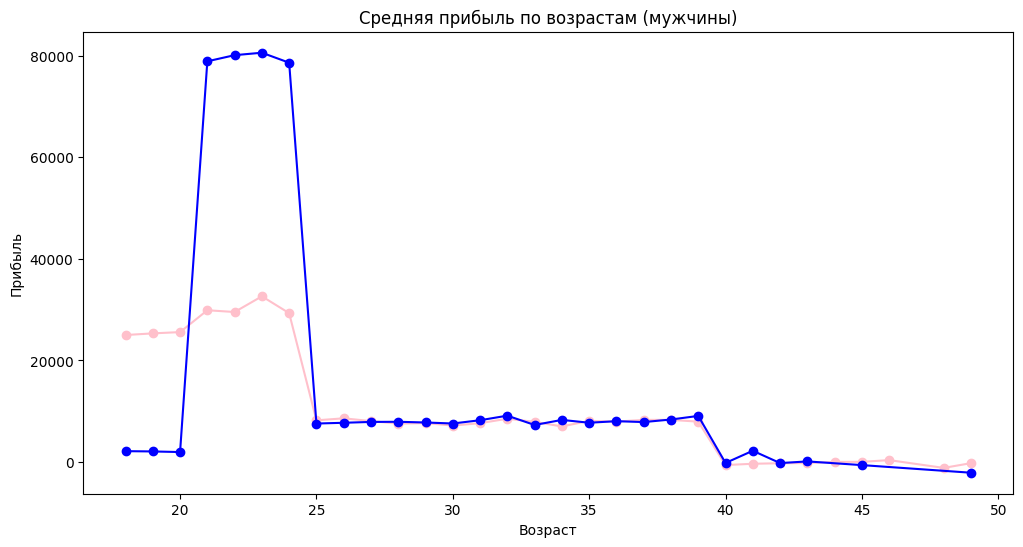

In [22]:
#Black
result_woman = df[df['Gender'] == 'female'].groupby('Age')['Profit'].mean()
result_man = df[df['Gender'] == 'male'].groupby('Age')['Profit'].mean()
print(result_man)

plt.figure(figsize = (12, 6))
result_woman.plot(
    x = 'Age',
    y = 'Profit',
    marker = 'o',
    color = 'pink',
    title = 'Средняя прибыль по возрастам (женщины)',
    xlabel = 'Возраст',
    ylabel = 'Прибыль',
    );

#plt.figure(figsize = (12, 6)) для отдельного графика
result_man.plot(
    x = 'Age',
    y = 'Profit',
    marker = 'o',
    color = 'blue',
    title = 'Средняя прибыль по возрастам (мужчины)',
    xlabel = 'Возраст',
    ylabel = 'Прибыль',
    figsize = (12, 6)
    );

#Вывод: мужчины 21-24 года - золотая жила